In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



# Convexity

### Three Conditions

There are three ways to define convexity. One definition works for any function, the second requires that the function is differentiable, and the third requires twice differentiability. Each has its own geometric interpretation. 

    (a) Walking in a straight line between points on the function keeps you above the function.
$$\text{For all } \lambda\in [0,1], x,y, \text{ we have } f(\lambda x + (1-\lambda)y)\le \lambda f(x)+(1-\lambda)f(y).$$

    (b) The tangent line at any point lies below the function (globally).
$$\text{For all } x,y, \text{ we have } f(y)\ge f(x) + f'(x)(y-x).$$

    (c) The second derivative is non-negative everywhere (aka the function is "concave up" everywhere).
$$\text{For all } x \text{ we have } f''(x)\ge 0.$$

Each of these definitions is useful in some cases, as we will see below, but it might not be obvious that they are equivalent. Suppose $f$ is any function we would deem *convex* by definition (a). We want to show that definition (b) holds. By definition (a), for any $\lambda$ we have 

$$ f(\lambda x + (1-\lambda)y)\le \lambda f(x)+(1-\lambda)f(y).$$

Rewrite this as

$$ f(y + \lambda(x-y))\le f(y) + \lambda (f(x)-f(y)).$$

Subtracting $f(y)$ and dividing by $\lambda$, we have 

\begin{align*}
f(x) - f(y) 
&\ge \frac{f(y + \lambda(x-y)) - f(y)}{\lambda} \\
&= \frac{f(y + \lambda(x-y)) - f(y)}{\lambda(x-y)} (x-y)
\end{align*}

Taking the limit as $\lambda\downarrow 0$ of $\frac{f(y + \lambda(x-y)) - f(y)}{\lambda(x-y)}$ gives the derivative $f'(y)$. Hence 

$$f(x) \ge f(y) + f'(y)(x-y).$$

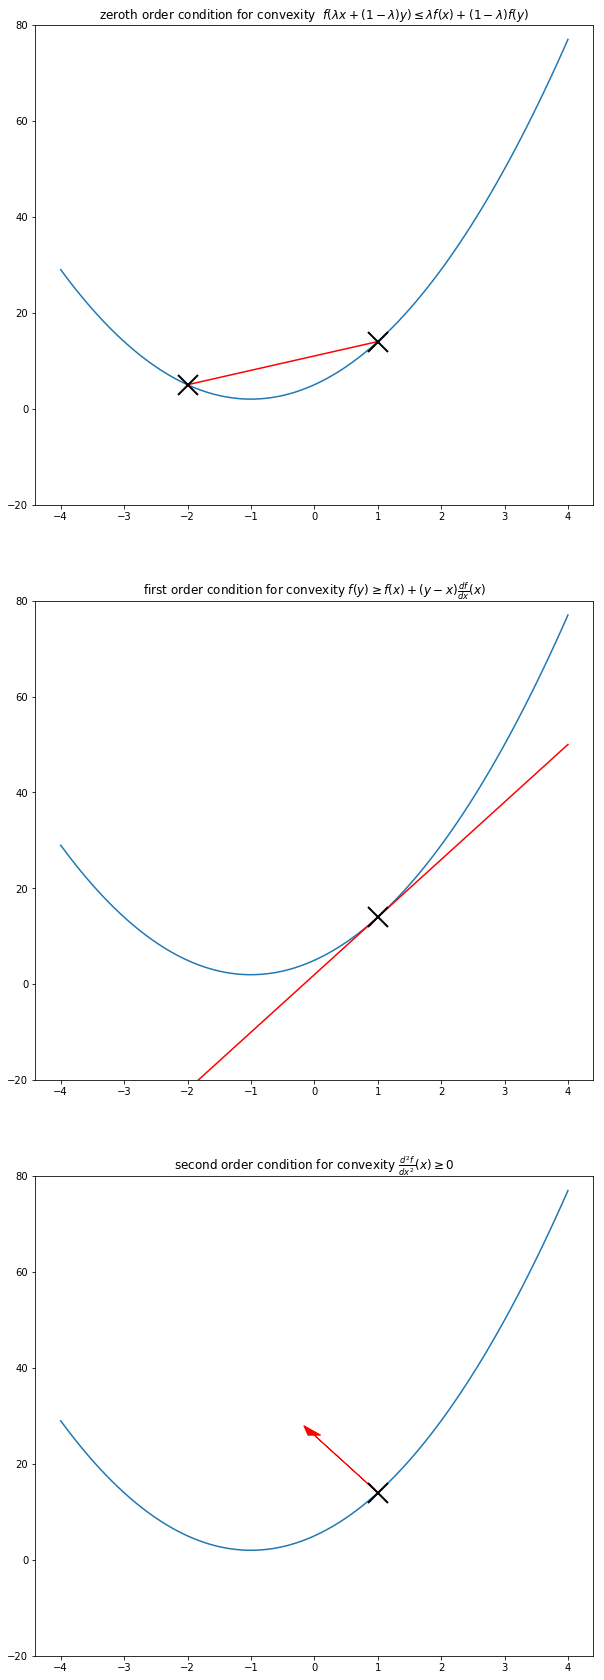

In [70]:
plt.figure(figsize=(10,30))
yy = 3*(xx+1)**2 + 2

plt.subplot(3,1,1)
plt.plot(xx,yy)
plt.plot(np.linspace(-2,1,50), 3*np.linspace(-2,1,50) + 11,'r-')
plt.plot([-2,1],[5,14],'kx',markersize=20,markeredgewidth=2)
plt.ylim([-20,80])
plt.title("zeroth order condition for convexity  $f(\lambda x+(1-\lambda)y) \leq \lambda f(x) + (1-\lambda)f(y)$")

plt.subplot(3,1,2)
plt.plot(xx,yy)
plt.plot(xx,12*xx+2,'r-')
plt.plot(1,14,'kx',markersize=20,markeredgewidth=2)
plt.ylim([-20,80])
plt.title("first order condition for convexity $f(y) \geq f(x) + (y-x)\\frac{df}{dx}(x)$")

plt.subplot(3,1,3)
plt.plot(xx,yy)
plt.arrow(1,14,-1,12,head_width=.2, head_length=2, fc='r', ec='r')
plt.plot(1,14,'kx',markersize=20,markeredgewidth=2)
plt.ylim([-20,80])
plt.title("second order condition for convexity $\\frac{d^2f}{dx^2}(x) \geq 0$")

plt.show()

## Establishing Convexity

**Example.** Consider $f(x) = |x|$. Since this function is not differentiable at $x=0$, we need to use definition (a), which says

$$|\lambda x + (1-\lambda)y| \le \lambda |x| + (1-\lambda)|y|.$$

Why is this inequality true? 

*Ans.* Triangle inequality. (Note, to show $|x+y|\le |x| + |y|$, can use $x^2+y^2+2|x||y| \ge x^2+ y^2+2xy$, and then factor to get $(|x|+|y|)^2 \ge |x+y|^2$).

**Example.** Consider $f(x) = x^2$. Since this function is twice differentiable, we can use definition (c),

$$f''(x) = 2 > 0.$$


Definition (b) is not very useful for establishing convexity of one-dimensional functions, but we can use it to prove some important facts:

**Fact.** If $f$ is convex and differentiable, then any point $x$ such that $f'(x) = 0$ minimizes $f$.

*Proof.* By definition (b), for any $y$,

$$f(y) \ge f(x) + f'(x)(y-x) = f(x) + 0 = f(x).$$


**Fact.** $\log(x)\ge 1-\frac{1}{x}$.

*Proof.* Using the fact that $f(x) = x\log(x)$ is convex (check by second derivative), we have (taking $y=1$)

$$
f(x) \ge f(1) + f'(1)(1-x)
$$

Writing this out,

$$
x\log(x) \ge 0 + (x-1) = x-1,
$$

Divide by $x$.


## Operations which Preserve Convexity

**Fact.** The sum of convex functions $h(x)=f(x)+g(x)$ is convex.

*Proof.* If we knew $f$ and $g$ were twice differentiable, we could take
$$h''(x) = f''(x) + g''(x) \ge 0,$$
and by definition (c), we'd be done. We would like to prove the claim for more general convex functions, so we will use definition (a). Let $x,y$ be any inputs and let $\lambda\in(0,1)$.
\begin{align*}
h(\lambda x + (1-\lambda)y) 
&= f(\lambda x + (1-\lambda)y) + g(\lambda x + (1-\lambda)y) && \text{by definition of } h\\
&\le \lambda f(x) + (1-\lambda)f(y) + \lambda g(x) + (1-\lambda)g(y) && \text{since } f,g \text{ are cvx} \\
&= \lambda(f(x)+g(x)) + (1-\lambda)(f(y)+g(y)) && \text{grouping terms} \\
&= \lambda h(x) + (1-\lambda)h(y)
\end{align*}

**Fact.** The max of convex functions $h(x) = \max\{f(x),g(x)\}$ is convex.

*Proof.* We will need to prove definition (a) since the max of two differentiable functions is not always differentiable. Let $x,y$ be any inputs and let $\lambda\in(0,1)$. We have

$$
f(\lambda x + (1-\lambda)y) \le \lambda f(x) + (1-\lambda)f(y) \le \lambda h(x) + (1-\lambda)h(y),
$$

and

$$
g(\lambda x + (1-\lambda)y) \le \lambda g(x) + (1-\lambda)g(y) \le \lambda h(x) + (1-\lambda)h(y).
$$

Hence

$$
h(\lambda x + (1-\lambda)y)\le \lambda h(x) + (1-\lambda)h(y).
$$

## Establishing Convexity (Continued)

Recall that *any* line $f(x) = ax + b$ is convex, even if the slope is negative! This is because $f''(x) = 0$ is non-negative. Writing $|x| = \max\{x,-x\}$, the previous fact gives an easy way to show that the absolute value function is convex.

**Example.** Show that a non-negative combination of convex functions $af(x) + bg(x)$ is convex.

**Example.** Show that if $f(x)$ is convex, so is $g(x) = f(ax+b)$.

**Example.** Show that $f(x) = \max\left\{5x\log(x) + 3x^2,|30x-2|\right\}$ is convex.

# Expected Value

## Linearity of Expectation

In class we defined the *expected value* of a random variable $X$ as an average of the values it can take on **weighted** by the probability of it taking on any given value. 

$$
\mathbb E[X] = \sum_x x\mathbb P(X=x)
$$

If we have two random variables $X$ and $Y$, the expectation of their sum is the sum of their expectations:

\begin{align*}
\mathbb E[X+Y] 
&= \sum_x\sum_y (x+y)\mathbb P(X=x,Y=y) \\
&= \sum_x\sum_y x\mathbb P(X=x,Y=y) + \sum_x\sum_y y\mathbb P(X=x,Y=y) \\
&= \sum_x x \sum_y\mathbb P(X=x,Y=y) + \sum_y y\sum_x\mathbb P(X=x,Y=y) \\
&= \sum_x x \mathbb P(X=x) + \sum_y y\mathbb P(Y=y) \\
&= \mathbb E[X]+\mathbb E[Y]
\end{align*}

Note that they don't need to be independent for this to hold. We could have $Y=X$, in which case $\mathbb E[X+Y] = 2\mathbb E[X]$, or $Y = -X$, in which case $X+Y = 0$, so $\mathbb E[X+Y] = 0$.

**Example.** We want to know on average the value of the sum of two fair dice $X$ and $Y$:
![dice](dice.png)
We could add up all $36$ numbers in this table and divide by $36$, or we could calculate the average value for one die $\frac{1}{6}((1+6)+(2+5)+(3+4)) = \frac{7}{2}$, and then by linearity, the average value of the sum of the pair is $\frac{7}{2} + \frac{7}{2} = 7$. This is true regardless of whether we roll the dice independently of each other, or make the second value equal to the first $Y=X$, or take $Y = 7 - X$. In any of these cases, the result $Y$ takes on the values $\{1,\dots,6\}$ with equal probability, and so does $X$.

**Example.** An *indicator variable* is a random variable given by $1$ whenever an event happens and $0$ whenever it doesn't happen. For example, consider the event that the first die roll is $X=2$. The related indicator variable is sometimes written as
$$
[[X=2]]
$$ 
and $[[X=2]] = 1$ when $X=2$ and $[[X=2]] = 0$ when $X \ne 2$. The average value of the indicator
$$
\mathbb E[[X=2]] =1\cdot\mathbb P([[X=2]]=1) + 0\cdot\mathbb P([[X=2]]=0) = \mathbb P([[X=2]]=1) =\mathbb P(X=2).
$$

## Designing a Loss Function

Recall that the $80$th $\%$ile of a set of observations $\{X_1,\dots,X_n\}$ is defined to be the smallest observation $X_k$ such that at least $80\%$ of the data, or $0.8n$ observations, are less than $X_k$. Fix $k$ and note that the number of observations less than $X_k$ is given by

$$
\sum_{i=1}^n [[X_i\le X_k]].
$$

If we could make this exactly $0.8n$, then noting that 

$$
\sum_{i=1}^n [[X_i\le X_k]] + \sum_{i=1}^n [[X_i> X_k]]  = n,
$$

we have

$$
\sum_{i=1}^n [[X_i> X_k]]  = 0.2n,
$$

The $80$th $\%$ile $\widehat\theta$ is given by

\begin{align}
4\sum_{i=1}^n [[X_i> \widehat\theta]]  = 0.8n = \sum_{i=1}^n [[X_i\le \widehat\theta]], ~~~~~~ (\star)
\end{align}

Suppose we wanted to design a loss function $\ell(x,\theta)$ such that $\widehat\theta$ given by $(\star)$ minimizes the empirical loss $L(\theta) = \frac{1}{n}\sum_{i=1}^n\ell(X_i,\theta)$. That is, we want it to satisfy

$$
\frac{1}{n}\sum_{i=1}^n\frac{\partial \ell(X_i,\theta)}{\partial \theta}= \frac{\partial L}{\partial \theta} = 0  = \frac{1}{n}\sum_{i=1}^n [[X_i\le \theta]] - 4\frac{1}{n}\sum_{i=1}^n [[X_i> \theta]] = \frac{1}{n}\sum_{i=1}^n\bigg([[X_i\le \theta]] - 4[[X_i> \theta]]\bigg).
$$

Hence our loss function should satisfy

$$
\frac{\partial \ell(x,\theta)}{\partial \theta}
= [[x\le \theta]] - 4[[x> \theta]]
= \begin{cases}
    1, & \text{if $x\le\theta$}.\\
    -4, & \text{if } x > \theta.
  \end{cases}
$$

We have thus reverse engineered the loss function minimized by the $80$th $\%$ile:

$$
\ell(x,\theta)
= \begin{cases}
    \theta - x, & \text{if $x\le\theta$}.\\
    4(x-\theta), & \text{if } x > \theta.
  \end{cases}
$$


# Bootstrap

In statistical estimation, we want to measure some property $\theta$ about a population. We cannot measure the population directly, so we collect some data and ask the same question, or measure the same property about our data to get an estimator $\widehat\theta$.

![estimation](statistics.png)

On its own, calculating an estimator is not really *doing* statistics. We want to then reason about how close $\widehat\theta$ is to the unknown quantity of interest $\theta$. We might wonder whether the answer would be right on average, i.e. $\mathbb E\widehat\theta = \theta$, and if not, how biased the answer is (if we had a lot of samples, how close would the average estimator be to the truth). We might also wonder how much variance the estimator has (if we had a lot of samples, how much would they vary), or construct a confidence interval (construct an interval $I$ based on $\widehat\theta$ so that most of the time it would cover $\theta$). 

Verifying any one of these would require sampling many times from the population, and calculating different estimators. If we had more data, we'd probably want to use it to get a better estimator, not to compare a bunch of them. This is where the *plug-in principle*, or bootstrap, comes in. We don't have access to the population, and we only have one dataset. We would like to access the population and sample from it as much as we care to. The plug-in principle says to estimate any accuracy properties on the data we have---i.e. *treat the sample as the population*. Then, we can draw as many subsamples as we care to, and measure how accurately the bootstrapped queries $\widetilde\theta$ calculated on the subsample estimate $\widehat\theta$. In analogy with the diagram above,

![bootstrap](bootstrap.png)

With this intuition, it's easier to come up with the procedures for bootstrapping bias or variance estimates or for bootstrapped confidence intervals. Intuitively, this analogy will be a useful one only insofar as the distribution (histogram) of the sample is to the distribution of the population.

## Bootstrap Sample Properties

In the bootstrap, we have a sample $\{X_1,\dots,X_n\}$ from which we *sample with replacement* $n$ times to obtain $\left\{\widetilde X_1,\dots,\widetilde X_n\right\}$. Equivalently, for each draw in our bootstrap sample, we pick a random number $i$ from $\{1,\dots,n\}$ and then add $X_i$ to our sample. Most likely, some of the values $\{X_1,\dots,X_n\}$ will show up more than once. 

**Question.** How likely are we to observe a data point $X_1$ in the bootstrap sample?

*Ans.* The probability that we don't pick $X_1$ in the $i$th draw is $1-\frac{1}{n}$. The probability that we don't pick $X_1$ at all is the probability that we don't pick it for the $1$st draw, for the second draw, and so on up to the $n$th draw. Since we are sampling them independently, this probability is the product

$$
\underbrace{\left(1-\frac{1}{n}\right)\cdots\left(1-\frac{1}{n}\right)}_{n \text{ times}} = \left(1-\frac{1}{n}\right)^n
$$

This is the probability that we *don't* observe $X_1$ at all, so the probability that we do observe it is one minus this:

$$
1-\left(1-\frac{1}{n}\right)^n.
$$

As $n$ gets large, this probability approaches $1-e^{-1}\approx 63.2\%$ (see [this proof](http://www.maths.manchester.ac.uk/~mprest/elimit.pdf) if you're curious).

In [83]:
# sample size
n = 100000
sample = np.arange(n)

# number of bootstrap replications
B = 10000
ct = 0
for b in range(B):
    # calculate a bootsrap sample
    subsample = np.random.choice(n,n)
    ct += (1 in subsample)
# print percentage of times subsample contained 1st observation
print(round(100*ct/B,1))

63.2


**Question.** How many times does a data point $X_1$ show up *on average* in the bootstrap sample?

*Ans.* First note that the number of times $T$ that $X_1$ is picked for the bootstrap sample can be written as
$$
T = \sum_{j=1}^n [[\widetilde X_j = X_1]],
$$
where $[[\widetilde X_j = X_1]]$ is $1$ if $\widetilde X_j = X_1$ and $0$ if $\widetilde X_j \ne X_1$. To get the expected number of times, use linearity of expectation!
$$
\mathbb E[T] = \sum_{j=1}^n \mathbb E[[\widetilde X_j = X_1]] = \sum_{j=1}^n \mathbb P\left(\widetilde X_j = X_1\right) = \sum_{j=1}^n \frac{1}{n} = 1.
$$
So the expected number of times $X_1$ shows up is $1$, and the same is true for every other observation $X_2,\dots,X_n$. This makes sense, since there are $n$ candidate positions and $n$ observations to choose from, with no one privileged over the other.

In [87]:
# sample size
n = 1000
sample = np.arange(n)

# number of bootstrap replications
B = 10000
T = 0
for b in range(B):
    # calculate a bootsrap sample
    subsample = np.random.choice(n,n)
    T += sum(subsample==1)
# print average number of occurrences
# of 1st observation in subsample 
print(round(T/B,2))

1.01
